In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

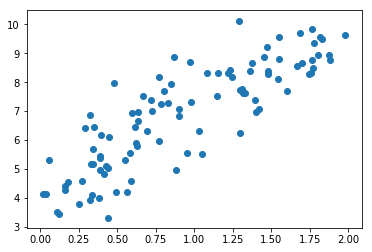

In [11]:
plt.scatter(X, y); plt.show()

In [12]:
X_b = np.c_[ np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [13]:
theta_best

array([[4.29480771],
       [2.76107761]])

In [15]:
X_new = np.array( [[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

In [16]:
y_predict

array([[4.29480771],
       [9.81696292]])

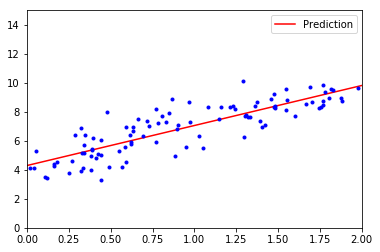

In [19]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.")
plt.axis([0,2,0,15])
plt.legend()
plt.show()

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.29480771]), array([[2.76107761]]))

In [22]:
lin_reg.predict(X_new)

array([[4.29480771],
       [9.81696292]])

In [23]:
# Gradient Descent

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initializaiton

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [24]:
theta

array([[4.29480771],
       [2.76107761]])

In [25]:
# Stocastic Gradient Descent

n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initilization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [26]:
theta

array([[4.27179699],
       [2.71119902]])

In [28]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor( max_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=50, n_iter=None, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [29]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.31099272]), array([2.77281241]))

In [ ]:
# Polynomial Regression